<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Exercise 2 - Imputing Missing Data</h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

## Objectives

Missing data refers to the absence of values for certain observations and is an unavoidable problem in most data sources. Scikit-learn does not support missing values as input, so we need to remove observations with missing data or transform them into permitted values. 

The act of replacing missing data with statistical estimates of missing values is called imputation. The goal of any imputation technique is to produce a complete dataset that can be used to train machine learning models. There are multiple imputation techniques we can apply to our data. The choice of imputation technique we use will depend on whether the data is missing at random, the number of missing values, and the machine learning model we intend to use. This week we will discuss several missing data imputation techniques.

Pls refer to the `Practical 2.0 - Practical 2.10` in the seperate files for details. 

## Exercise

Use airbnb singapore dataset (`airbnb_sg.csv`) and build missing value imputation pipelines to clean the data properly.

In [1]:
### Task 0: import all the required packages
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import feature_engine.imputation as mdi
import plotly as plt

In [2]:
# load the airbnb_sg dataset 
data = pd.read_csv('./data/airbnb_sg.csv')

# add more missing values to random positions
random.seed(10)
values = set([random.randint(0, len(data)) for p in range(0, 100)])
for var in ['neighbourhood', 'room_type', 'minimum_nights', 'availability_365']:
    data.loc[values, var] = np.nan
    
data.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                      100
latitude                             0
longitude                            0
room_type                          100
price                                0
minimum_nights                     100
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                   100
dtype: int64

In [3]:
# Task 1: separate the data into training (70%) and testing sets (30%)
# Target Variable is "price"
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('price', axis=1), data['price'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((5534, 15), (2373, 15))

In [4]:
# Task 2: find categorical variables 
catdata = [c for c in data.columns if data[c].dtypes=='O']
display(data[catdata].head())
data[catdata].isnull().mean().sort_values()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,COZICOMFORT LONG TERM STAY ROOM 2,Francesca,North Region,Woodlands,Private room,2013-10-21
1,Pleasant Room along Bukit Timah,Sujatha,Central Region,Bukit Timah,Private room,2014-12-26
2,COZICOMFORT,Francesca,North Region,Woodlands,Private room,2015-10-01
3,Ensuite Room (Room 1 & 2) near EXPO,Belinda,East Region,Tampines,Private room,2019-08-11
4,B&B Room 1 near Airport & EXPO,Belinda,East Region,Tampines,Private room,2019-07-28


host_name              0.000000
neighbourhood_group    0.000000
name                   0.000253
neighbourhood          0.012647
room_type              0.012647
last_review            0.348805
dtype: float64

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>],
       [<AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>,
        <AxesSubplot:title={'center':'calculated_host_listings_count'}>],
       [<AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

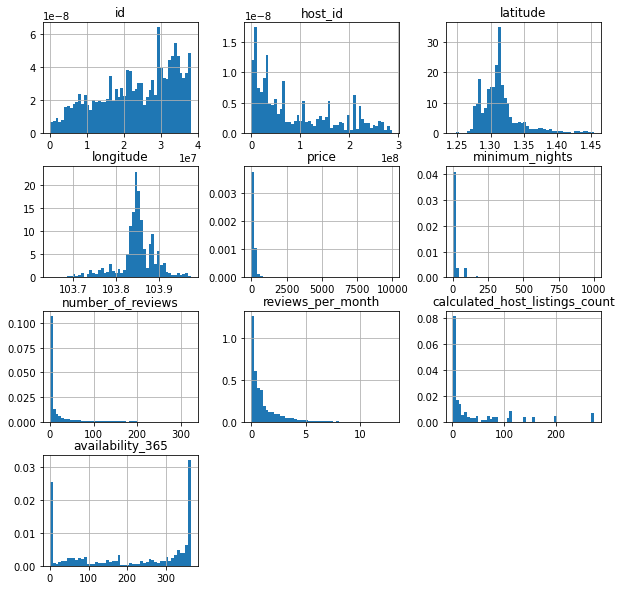

In [5]:
# Task 3: Find numerical variables and plot the histogram to the num variables
numericdata = [n for n in data.columns if (data[n].dtypes!='O')]
data[numericdata].hist(bins=50, figsize=(10,10), density=True)

In [6]:
# Task 4: make a list with numerical varibles (arbitrary & median) and categorical variables (frequent & missing). 
features_num_arbitrary = ['reviews_per_month']
features_num_median = ['availability_365', 'minimum_nights']
features_cat_frequent = ['last_review', 'neighbourhood']
features_cat_missing = ['room_type', 'name']

In [7]:
# Task 5: Assembling an imputation pipeline with scikit-learn

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('price', axis=1), data['price'], test_size=0.3, random_state=0)

#Check the training and testing sets
print(X_train.shape, X_test.shape)
print(X_train.isnull().sum())

#Making the imputer in the pipeline
imputer_num_arbitrary = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value=-1))])
imputer_num_median = Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])
imputer_cat_frequent = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))])
imputer_cat_missing = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='Missing'))])

preprocessor = ColumnTransformer(transformers=[
    ('imp_num_arbitrary', imputer_num_arbitrary, features_num_arbitrary),
    ('imp_num_median', imputer_num_median, features_num_median),
    ('imp_cat_frequent', imputer_cat_frequent, features_cat_frequent),
    ('imp_cat_missing', imputer_cat_missing, features_cat_missing),
    ], remainder='passthrough')

#Calculates the mean and standard deviation
preprocessor.fit(X_train)
#Perform standardization/imputation
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)
df2 = pd.DataFrame(X_train)

#Checking the results after the imputation pipeline
display(df2)
pd.DataFrame(X_train).isnull().sum()

(5534, 15) (2373, 15)
id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                       64
latitude                             0
longitude                            0
room_type                           64
minimum_nights                      64
number_of_reviews                    0
last_review                       1899
reviews_per_month                 1899
calculated_host_listings_count       0
availability_365                    64
dtype: int64


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.0,21.0,180.0,2019-08-12,Queenstown,Private room,Pasir View Park - 200 Pasir Panjang Road,16367233,107188825,Matt,Central Region,1.27931,103.78746,0,1
1,3.06,126.0,26.0,2019-05-28,Kallang,Private room,Pool view bedroom in central SG with own toilet,12934345,26891269,Jenna & Nunu,Central Region,1.32014,103.86398,121,1
2,0.76,260.0,3.0,2018-12-26,Kallang,Missing,Cozy Room@Punggol - 1 LRT station to Punggol MRT,25489396,28260347,Carmen,North-East Region,1.40436,103.90788,11,1
3,0.42,260.0,3.0,2019-08-03,Kallang,Missing,"ZB SGRV08-0 Somerset,Clark Quay 1 bedroom,POOL...",22382687,34574973,Jenny,Central Region,1.29492,103.84274,4,2
4,1.14,357.0,1.0,2019-08-10,Kallang,Shared room,SPACE CAPSULE - NEW EXPERIENCE,24506830,182727326,Atlantis,Central Region,1.31493,103.85839,18,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5529,1.5,334.0,2.0,2019-07-15,Geylang,Entire home/apt,❤❤ 2BR Spacious & Clean w/ WIFI @ Geylang,29141674,209913841,Richards,Central Region,1.3112,103.87613,3,157
5530,1.19,63.0,5.0,2019-08-10,Geylang,Entire home/apt,Cozy Apartment 10 mins to Aljunied MRT,21765670,23722617,Alex,Central Region,1.31468,103.88779,24,84
5531,0.03,0.0,2.0,2016-07-11,River Valley,Private room,Large bedroom w/ use of whole 1st floor of duplex,13735926,80393016,Kevin,Central Region,1.29735,103.83482,1,1
5532,-1.0,0.0,7.0,2019-08-12,Jurong East,Entire home/apt,NEW LIST: Nice & big 1 Bedrm apartment near to...,18954823,132164074,Mandy,West Region,1.34679,103.73303,0,1


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [8]:
# Task 6: Assembling an imputation pipeline using Feature Engine
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('price', axis=1), data['price'], test_size=0.3, random_state=0)

#Checking the training sets
print(X_train.shape, X_test.shape)
print(X_train.isnull().sum())

#Making the list with the variables
features_num_arbitrary = ['reviews_per_month']
features_num_median = ['availability_365', 'minimum_nights']
features_cat_missing = ['room_type', 'name']
features_cat_frequent = ['last_review', 'neighbourhood']

pipe = Pipeline(steps=[
    ('imp_num_arbitrary', mdi.ArbitraryNumberImputer(variables = features_num_arbitrary)),
    ('imp_num_median', mdi.MeanMedianImputer(imputation_method = 'median', variables=features_num_median)),
    ('imp_cat_frequent', mdi.CategoricalImputer(variables = features_cat_frequent, imputation_method='frequent')),
    ('imp_cat_missing', mdi.CategoricalImputer(variables=features_cat_missing, imputation_method='missing'))])

pipe.fit(X_train)
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

#Checking the data after the transformation
display(X_train)
X_train.isnull().sum()

(5534, 15) (2373, 15)
id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                       64
latitude                             0
longitude                            0
room_type                           64
minimum_nights                      64
number_of_reviews                    0
last_review                       1899
reviews_per_month                 1899
calculated_host_listings_count       0
availability_365                    64
dtype: int64


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2091,16367233,Pasir View Park - 200 Pasir Panjang Road,107188825,Matt,Central Region,Queenstown,1.27931,103.78746,Private room,180.0,0,2019-08-12,999.00,1,21.0
1525,12934345,Pool view bedroom in central SG with own toilet,26891269,Jenna & Nunu,Central Region,Kallang,1.32014,103.86398,Private room,26.0,121,2019-05-28,3.06,1,126.0
4111,25489396,Cozy Room@Punggol - 1 LRT station to Punggol MRT,28260347,Carmen,North-East Region,Kallang,1.40436,103.90788,Missing,3.0,11,2018-12-26,0.76,1,260.0
3443,22382687,"ZB SGRV08-0 Somerset,Clark Quay 1 bedroom,POOL...",34574973,Jenny,Central Region,Kallang,1.29492,103.84274,Missing,3.0,4,2019-08-03,0.42,2,260.0
3904,24506830,SPACE CAPSULE - NEW EXPERIENCE,182727326,Atlantis,Central Region,Kallang,1.31493,103.85839,Shared room,1.0,18,2019-08-10,1.14,7,357.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,29141674,❤❤ 2BR Spacious & Clean w/ WIFI @ Geylang,209913841,Richards,Central Region,Geylang,1.31120,103.87613,Entire home/apt,2.0,3,2019-07-15,1.50,157,334.0
3264,21765670,Cozy Apartment 10 mins to Aljunied MRT,23722617,Alex,Central Region,Geylang,1.31468,103.88779,Entire home/apt,5.0,24,2019-08-10,1.19,84,63.0
1653,13735926,Large bedroom w/ use of whole 1st floor of duplex,80393016,Kevin,Central Region,River Valley,1.29735,103.83482,Private room,2.0,1,2016-07-11,0.03,1,0.0
2607,18954823,NEW LIST: Nice & big 1 Bedrm apartment near to...,132164074,Mandy,West Region,Jurong East,1.34679,103.73303,Entire home/apt,7.0,0,2019-08-12,999.00,1,0.0


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64